In [1]:
# import necessary modules

import numpy as np
import math
from numpy.fft import fft, ifft , rfft, irfft , fftfreq
from numpy import exp, log, log10, cos, sin, pi, cosh, sinh , sqrt
from classy import Class
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.special import gamma
from scipy.special import hyp2f1
from scipy.optimize import fsolve
import sys,os
from time import time
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy import special
from scipy.special import factorial

import matplotlib
import matplotlib.pyplot as plt

from Helper_Functions_NUT5 import Get_LCDM_Pks, Get_NU_Pks, Get_WDM_Tx, Calc_K_Max

# for crisper plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size']=11
# plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stix'
plt.rcParams['figure.figsize']= (6.5,4)
plt.rcParams['figure.dpi']=150
plt.rcParams['axes.facecolor'] = 'white'

In [2]:
def Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                                  f_nudm, u_ncdmdm_scale, N_ur, N_ncdm, m_ncdm, u_ncdmdm):
    NU = Class()
    
    # pass input parameters
    NU.set({'h':h, 'omega_b':omega_b, 'omega_cdm':omega_cdm, 'tau_reio':tau_reio, 'A_s':A_s, 'n_s':n_s, \
            'k_scalar_k_per_decade_for_pk':k_per_decade})
    NU.set({'N_ur':N_ur, 'N_ncdm':N_ncdm})
    NU.set({'output':'tCl,pCl,lCl,mPk,mTk','lensing':'yes','P_k_max_1/Mpc':P_k_max,'gauge': 'newtonian','non linear':'Halofit'})
    NU.set({'f_nudm':f_nudm, 'u_ncdmdm_scale':u_ncdmdm_scale})
    
    params1 = {}
    params1['m_ncdm']=m_ncdm
    NU.set(params1)  
    
    params2 = {}
    params2['u_ncdmdm']=u_ncdmdm
    NU.set(params2) 
    
    # run class
    NU.compute()
    
    # retrieve pk's at z=0
    h = NU.h()
    k_vec = np.logspace(-4,np.log10(P_k_max),100) # units of h/Mpc
    NU_Pk_vec = np.zeros(len(k_vec))  # units of (Mpc/h)**3
    for k in range(len(k_vec)):
        NU_Pk_vec[k]=NU.pk(k_vec[k]*h,0.) * h**3
    
    # output
    return k_vec, NU_Pk_vec

In [3]:
# Initialize parameter space 
h=0.67556; omega_b=0.022032; omega_cdm=0.12038; tau_reio=0.0925; A_s=2.215e-9; n_s=0.9619; P_k_max=130; k_per_decade=10
m_NU = '0.04,0.04,0.04'; u_ncdmdm_scale='log'; N_ur=0.00641; N_ncdm=3;
#sigma_NU = np.linspace(-6,-8,20)
sigma_NU = '-2,-2,-2'; f_nudm = [1, 0.9, 0.5, 0.1]

In [11]:
k_vec, NU_Pk_vec_0 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[0], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_1 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[1], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_2 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[2], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_3 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[3], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

# k_vec, LCDM_Pk_vec = Get_LCDM_Pks(h, omega_b, 0.12038, tau_reio, A_s, n_s, P_k_max, k_per_decade, N_ur, N_ncdm,  m_NU)

In [5]:
# Initialize parameter space again for Halofit
h=0.67556; omega_b=0.022032; omega_cdm=0.12038; tau_reio=0.0925; A_s=2.215e-9; n_s=0.9619; P_k_max=130; k_per_decade=10
m_NU = '0.04,0.04,0.04'; u_ncdmdm_scale='log'; N_ur=0.00641; N_ncdm=3;
#sigma_NU = np.linspace(-6,-8,20)
sigma_NU = '-5,-5,-5'; f_nudm = [1, 0.9, 0.5, 0.1]


k_vec, NU_Pk_vec_0_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[0], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_1_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[1], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_2_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[2], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_3_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[3], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

# k_vec, LCDM_Pk_vec_h = Get_LCDM_Pks(h, omega_b, 0.12038, tau_reio, A_s, n_s, P_k_max, k_per_decade, N_ur, N_ncdm,  m_NU)

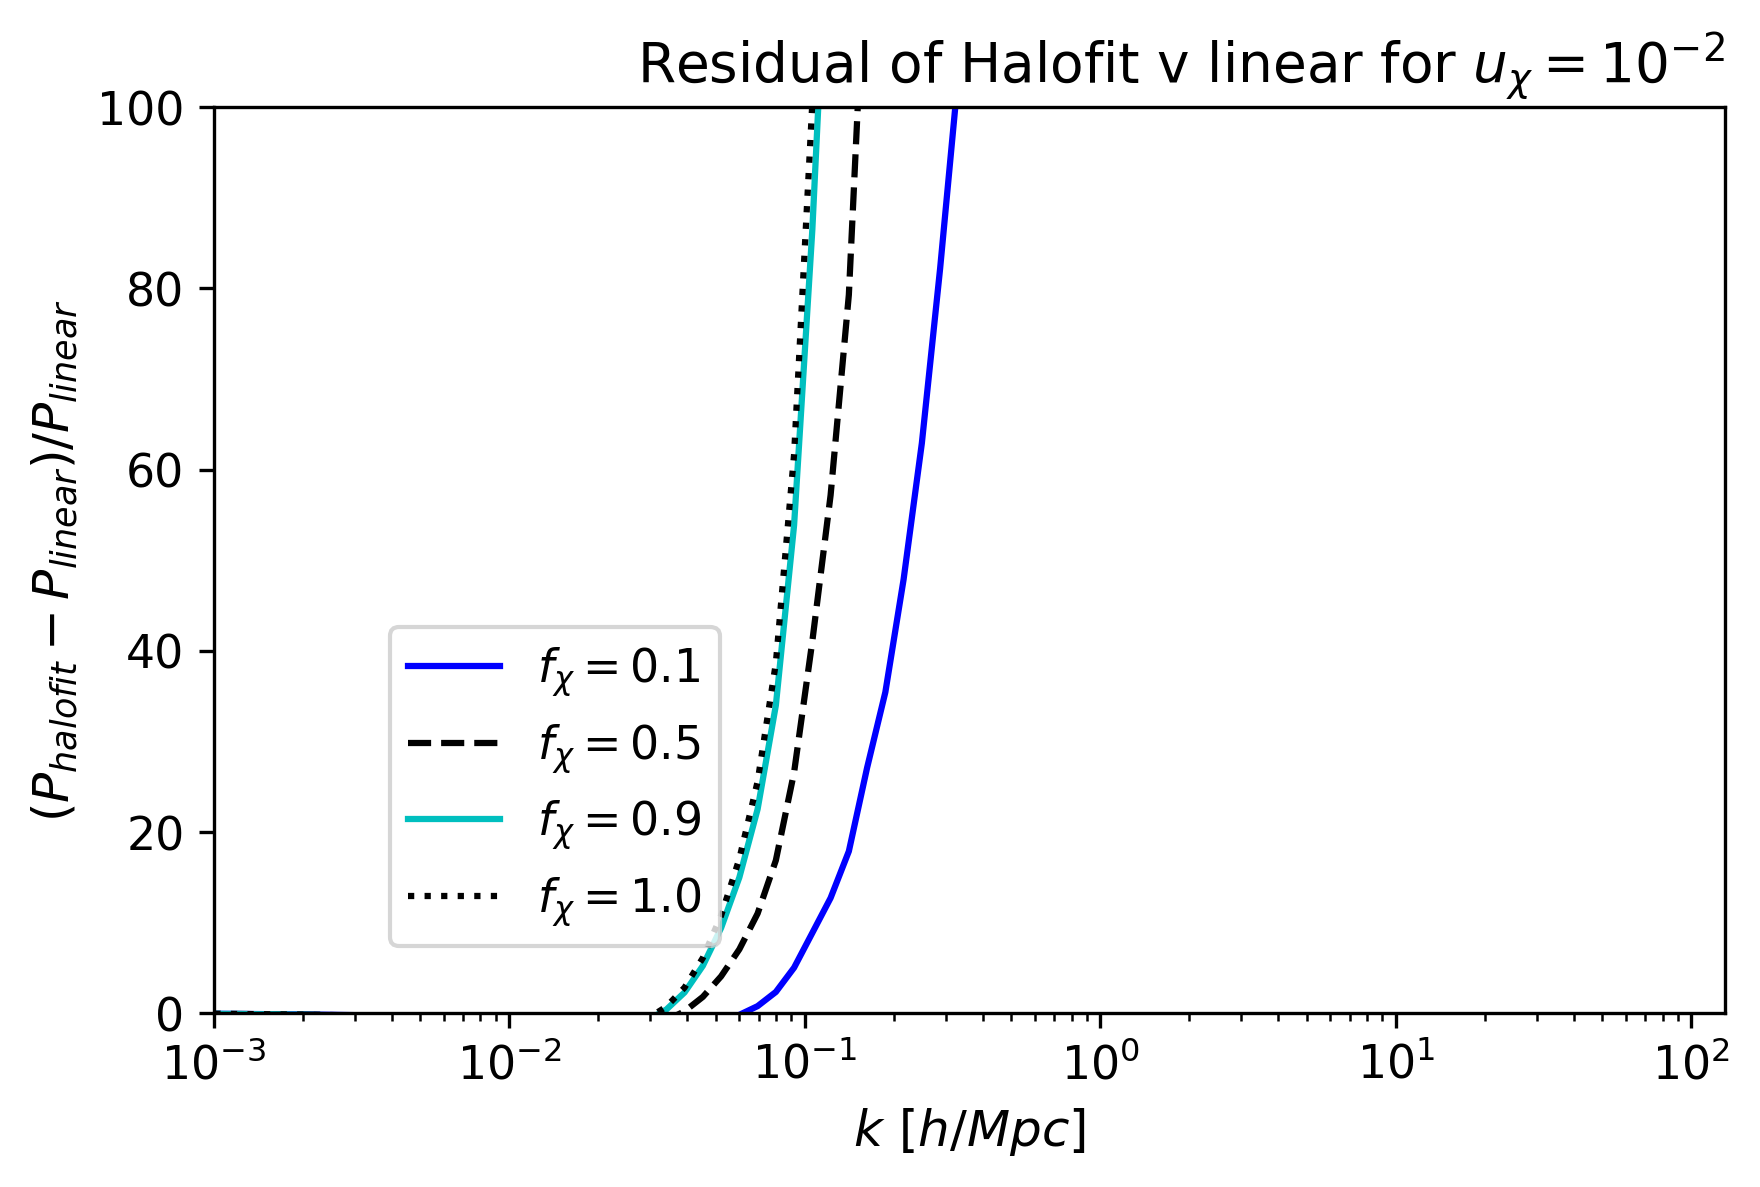

In [8]:
omega_dmeff=0.1199; m_dmeff = 6.5 #3.26 #KeV 
# k_vec, WDM_Tx_vec = Get_WDM_Tx(m_dmeff, omega_dmeff, k_vec, h)

# plt.plot(k_vec,WDM_Tx_vec,'r-',label=r'$WDM$ $Cutoff$')

plt.plot(k_vec,100*(NU_Pk_vec_3_h-NU_Pk_vec_3)/NU_Pk_vec_3,'b-',label=r'$f_{\chi}=0.1$')

plt.plot(k_vec,100*(NU_Pk_vec_2_h-NU_Pk_vec_2)/NU_Pk_vec_2,'k--',label=r'$f_{\chi}=0.5$')

plt.plot(k_vec,100*(NU_Pk_vec_1_h-NU_Pk_vec_1)/NU_Pk_vec_1,'c-',label=r'$f_{\chi}=0.9$')

plt.plot(k_vec,100*(NU_Pk_vec_0_h-NU_Pk_vec_0)/NU_Pk_vec_0,'k:',label=r'$f_{\chi}=1.0$')

# Plot specifications
plt.xscale("log")
plt.xlim(1e-3,130)
plt.ylim(0,100)
plt.title('Residual of Halofit v linear for $u_{\chi}=10^{-2}$', loc='right')
plt.xlabel(r'$k\ [h/Mpc]$',fontsize=12)
plt.ylabel(r'$(P_{halofit}-P_{linear})/P_{linear}$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(0.35, 0.25))
# plt.savefig('Residual halofit DM-NU Fractional_2 Tks')

In [22]:
# Initialize parameter space 
h=0.67556; omega_b=0.022032; omega_cdm=0.12038; tau_reio=0.0925; A_s=2.215e-9; n_s=0.9619; P_k_max=130; k_per_decade=10
m_NU = '0.04,0.04,0.04'; u_ncdmdm_scale='log'; N_ur=0.00641; N_ncdm=3;
#sigma_NU = np.linspace(-6,-8,20)
sigma_NU = '-5,-5,-5'; f_nudm = [1, 0.9, 0.5, 0.1]

k_vec, NU_Pk_vec_0 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[0], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_1 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[1], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_2 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[2], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_3 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[3], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_0_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[0], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_1_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[1], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_2_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[2], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_3_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[3], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

# k_vec, LCDM_Pk_vec = Get_LCDM_Pks(h, omega_b, 0.12038, tau_reio, A_s, n_s, P_k_max, k_per_decade, N_ur, N_ncdm,  m_NU)

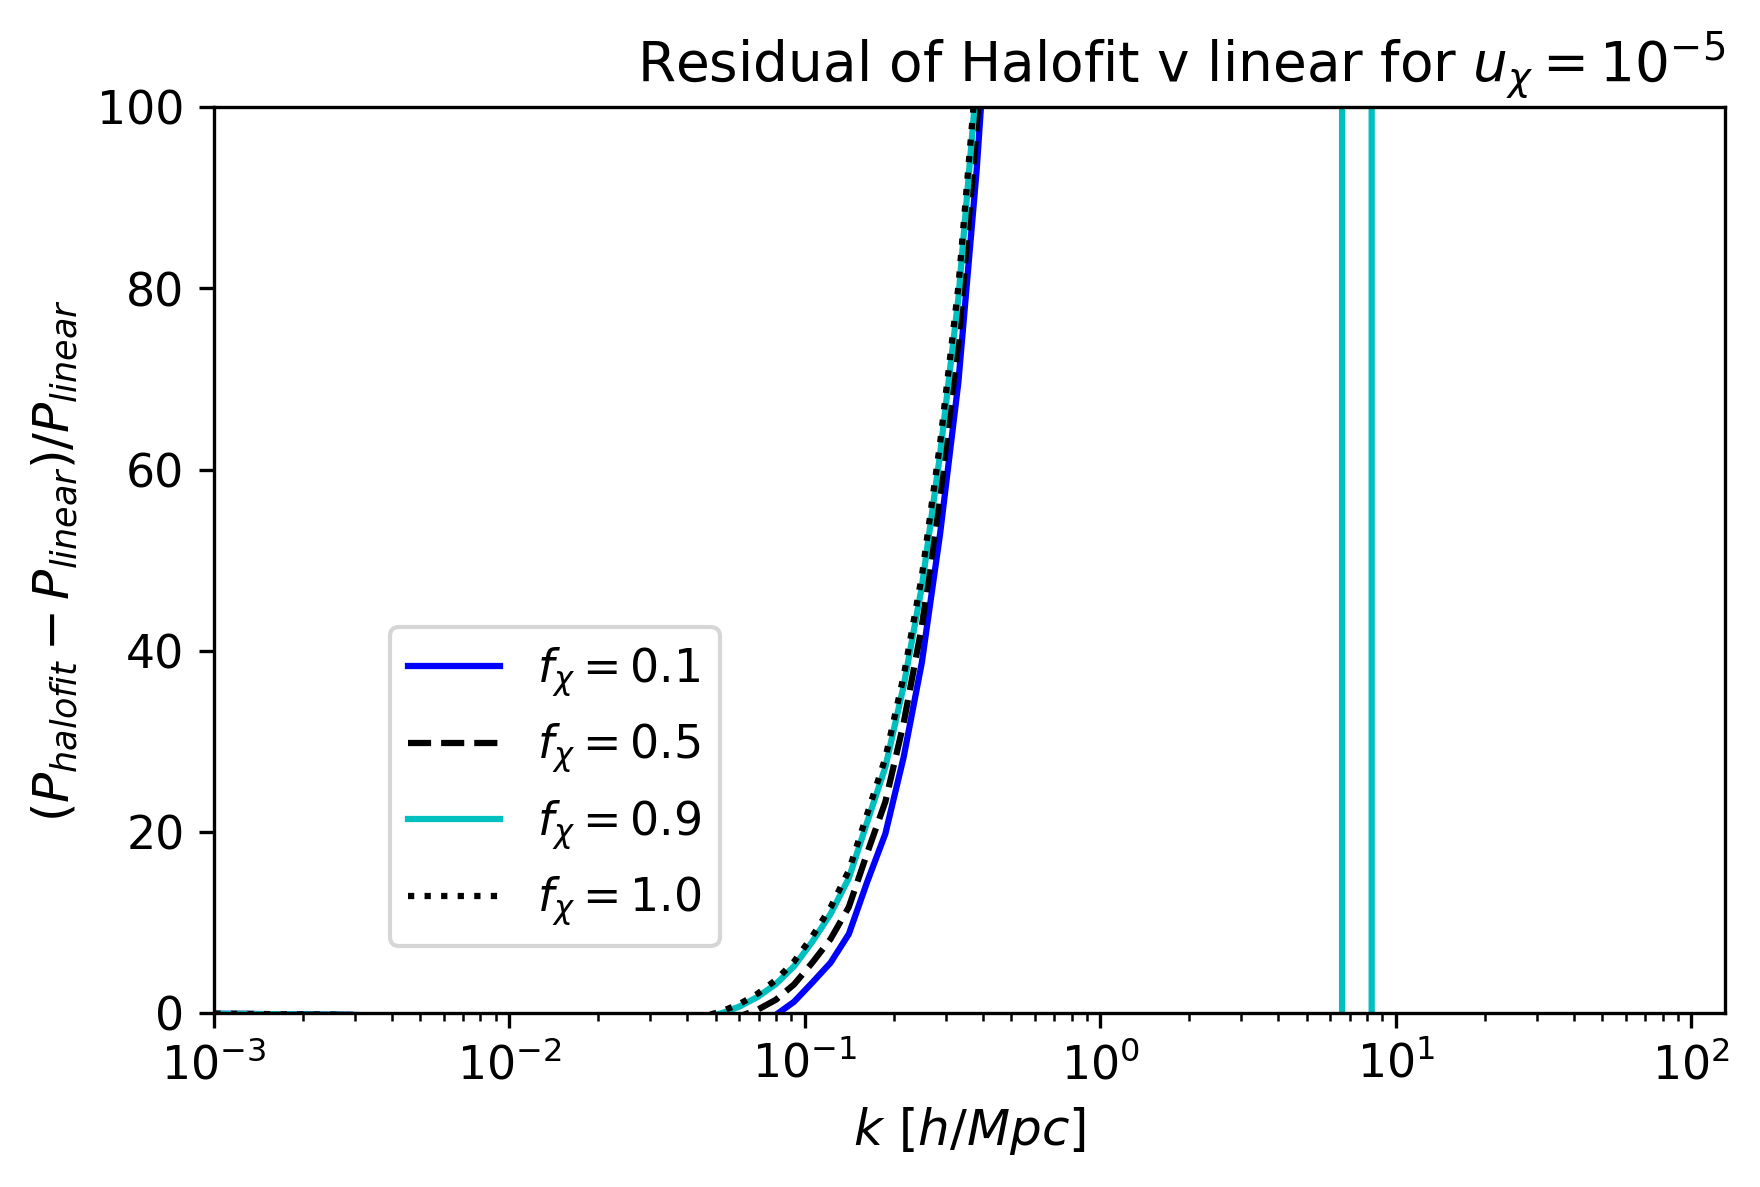

In [30]:
omega_dmeff=0.1199; m_dmeff = 6.5 #3.26 #KeV 
k_vec, WDM_Tx_vec = Get_WDM_Tx(m_dmeff, omega_dmeff, k_vec, h)

# plt.plot(k_vec,WDM_Tx_vec,'r-',label=r'$WDM$ $Cutoff$')

plt.plot(k_vec,100*(NU_Pk_vec_3_h-NU_Pk_vec_3)/NU_Pk_vec_3,'b-',label=r'$f_{\chi}=0.1$')

plt.plot(k_vec,100*(NU_Pk_vec_2_h-NU_Pk_vec_2)/NU_Pk_vec_2,'k--',label=r'$f_{\chi}=0.5$')

plt.plot(k_vec,100*(NU_Pk_vec_1_h-NU_Pk_vec_1)/NU_Pk_vec_1,'c-',label=r'$f_{\chi}=0.9$')

plt.plot(k_vec,100*(NU_Pk_vec_0_h-NU_Pk_vec_0)/NU_Pk_vec_0,'k:',label=r'$f_{\chi}=1.0$')

# Plot specifications
plt.xscale("log")
plt.xlim(1e-3,130)
plt.ylim(0,100)
plt.title('Residual of Halofit v linear for $u_{\chi}=10^{-5}$', loc='right')
plt.xlabel(r'$k\ [h/Mpc]$',fontsize=12)
plt.ylabel(r'$(P_{halofit}-P_{linear})/P_{linear}$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(0.35, 0.25))
# plt.savefig('Residual halofit DM-NU Fractional_5 Tks')

In [14]:
# Initialize parameter space 
h=0.67556; omega_b=0.022032; omega_cdm=0.12038; tau_reio=0.0925; A_s=2.215e-9; n_s=0.9619; P_k_max=180; k_per_decade=10
m_NU = '0.04,0.04,0.04'; u_ncdmdm_scale='log'; N_ur=0.00641; N_ncdm=3;
#sigma_NU = np.linspace(-6,-8,20)
sigma_NU = '-7,-7,-7'; f_nudm = [1, 0.9, 0.5, 0.1]

k_vec, NU_Pk_vec_0 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[0], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_1 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[1], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_2 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[2], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_3 = Get_NU_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[3], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_0_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[0], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_1_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[1], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_2_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[2], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

k_vec, NU_Pk_vec_3_h = Get_NU_Pks_halofit(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, \
                      f_nudm[3], u_ncdmdm_scale, N_ur, N_ncdm, m_NU, sigma_NU)

# k_vec, LCDM_Pk_vec = Get_LCDM_Pks(h, omega_b, 0.12038, tau_reio, A_s, n_s, P_k_max, k_per_decade, N_ur, N_ncdm,  m_NU)

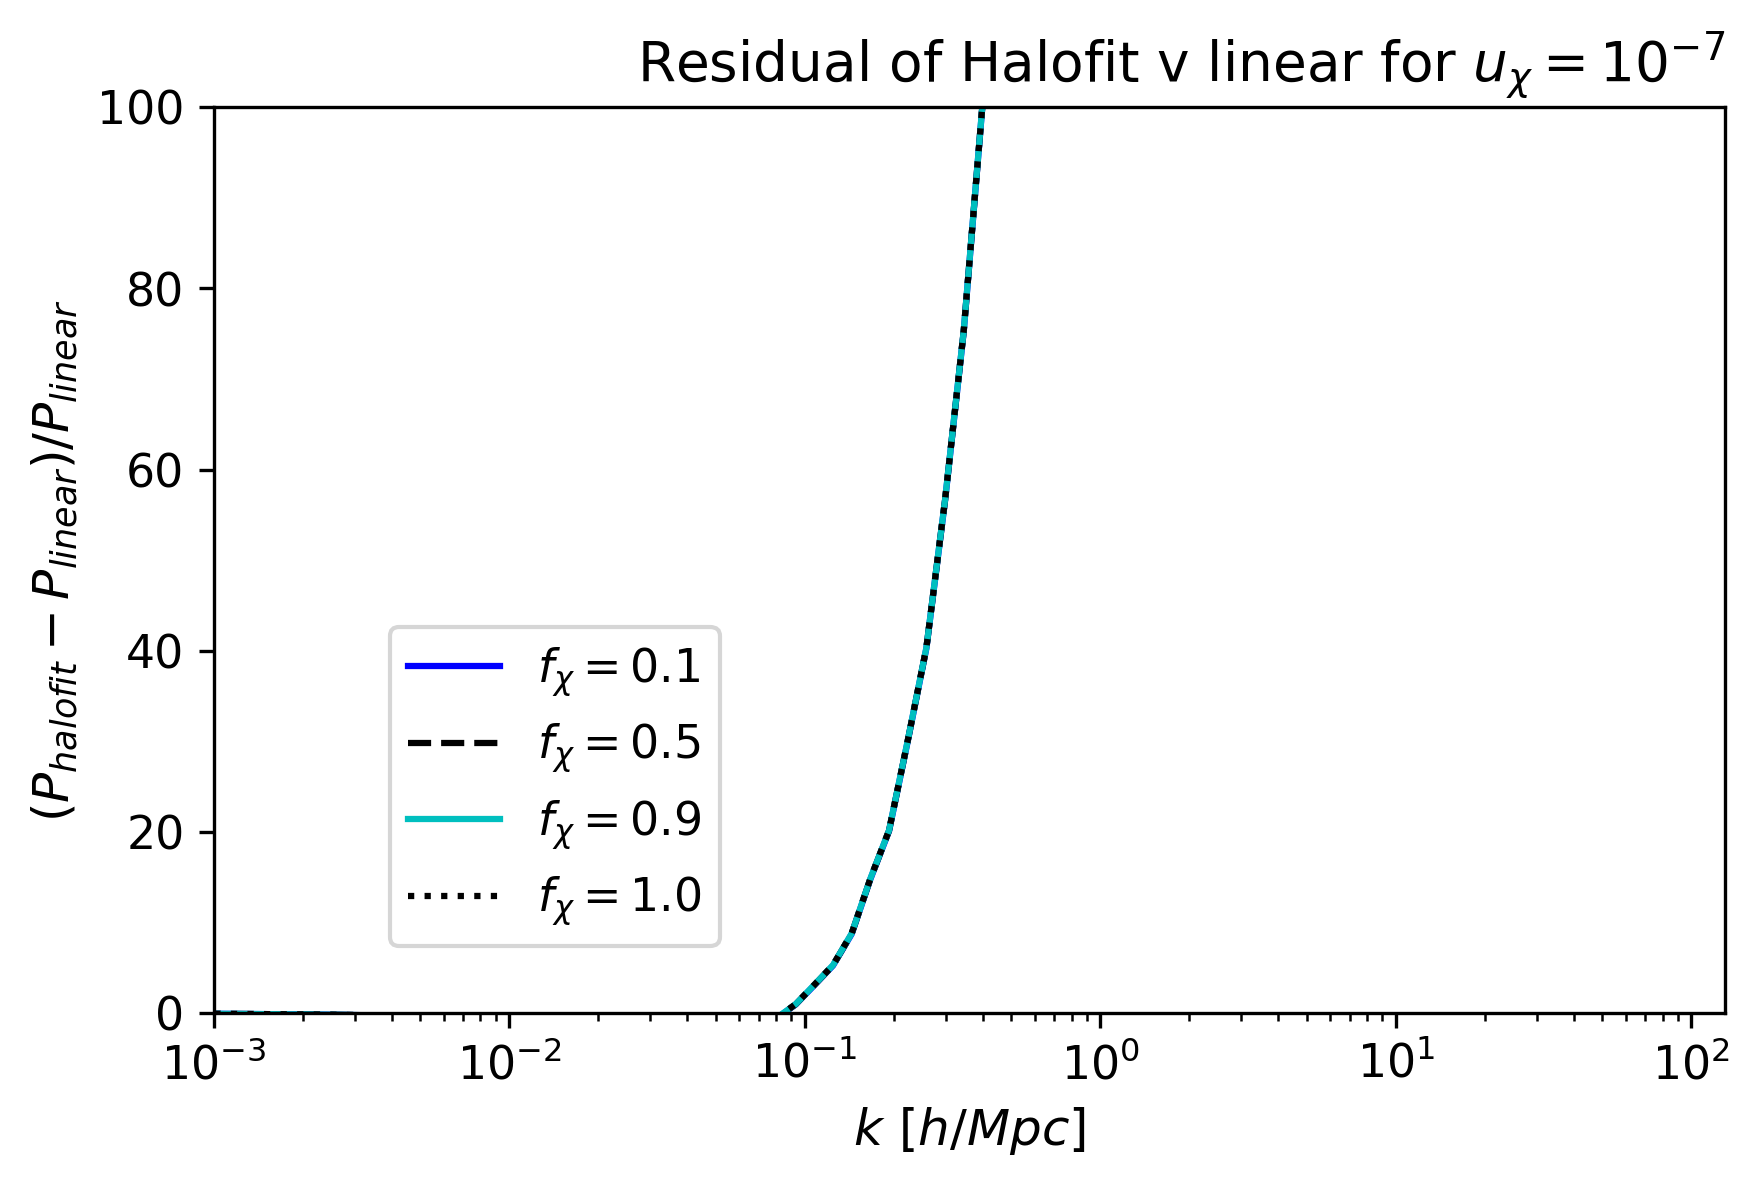

In [21]:
omega_dmeff=0.1199; m_dmeff = 6.5 #3.26 #KeV 
k_vec, WDM_Tx_vec = Get_WDM_Tx(m_dmeff, omega_dmeff, k_vec, h)

# plt.plot(k_vec,WDM_Tx_vec,'r-',label=r'$WDM$ $Cutoff$')

plt.plot(k_vec,100*(NU_Pk_vec_3_h-NU_Pk_vec_3)/NU_Pk_vec_3,'b-',label=r'$f_{\chi}=0.1$')

plt.plot(k_vec,100*(NU_Pk_vec_2_h-NU_Pk_vec_2)/NU_Pk_vec_2,'k--',label=r'$f_{\chi}=0.5$')

plt.plot(k_vec,100*(NU_Pk_vec_1_h-NU_Pk_vec_1)/NU_Pk_vec_1,'c-',label=r'$f_{\chi}=0.9$')

plt.plot(k_vec,100*(NU_Pk_vec_0_h-NU_Pk_vec_0)/NU_Pk_vec_0,'k:',label=r'$f_{\chi}=1.0$')

# Plot specifications
plt.xscale("log")
plt.xlim(1e-3,130)
plt.ylim(0,100)
plt.title('Residual of Halofit v linear for $u_{\chi}=10^{-7}$', loc='right')
plt.xlabel(r'$k\ [h/Mpc]$',fontsize=12)
plt.ylabel(r'$(P_{halofit}-P_{linear})/P_{linear}$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(0.35, 0.25))
# plt.savefig('Residual halofit DM-NU Fractional_7 Tks')

In [ ]:
#Starting CLASS

z_pk = 0.61
common_settings = {# fixed parameters
                   'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.052,
                   'omega_b':0.02237,
                   'h':0.6736,
                   'YHe':0.2425,
#                   'N_eff':3.046,
                   'N_ur':2.0328,
                   'N_ncdm':1,
#                   'N_ncdm':0,
                   'm_ncdm':0.06,
                   # Interacting Dark Matter parameters
                   'sigma_dmeff':1e-25,
                   'omega_cdm':1e-15,
                   'm_dmeff':1.0,
                   'npow_dmeff':0,
                   'Vrel_dmeff':0,
                   'dmeff_target': 'baryons',
                   # other output and precision parameters
                   'P_k_max_1/Mpc':100.0,
                   'z_pk':z_pk,
                   'output':'mPk,tCl,pCl,lCl',
                   'lensing':'yes'}

#                   'z_max_pk':20.,

M = Class()
M.set(common_settings)
#compute linear
M.set({ 'non linear':'no',
        'omega_dmeff':0.120,
      })

M.compute()

M1 = Class()
M1.set(common_settings)
#compute Halofit
M1.set({'non linear':'Halofit',
        'omega_dmeff':0.120,
      })

M1.compute()

#now we compute EFT
M2 = Class()
M2.set(common_settings)
M2.set({'non linear':'PT',
        'IR resummation':'Yes',
        'Bias tracers':'Yes',
        'cb':'No',
        'RSD':'Yes',
        'AP':'Yes',
        'Omfid':'0.31',
        'omega_dmeff':0.120,
       })
M2.compute()

#Extracting and plotting spectra

bg_linear = M.get_background()
th_linear = M.get_thermodynamics()
cl_linear = M.lensed_cl()

bg_Halofit = M1.get_background()
th_Halofit = M1.get_thermodynamics()
cl_Halofit = M1.lensed_cl()

bg_EFT = M2.get_background()
th_EFT = M2.get_thermodynamics()
cl_EFT = M2.lensed_cl()

h = M.h()
k = np.linspace(log(0.0001),log(50),200)
k = np.exp(k)
twopi = 2.*math.pi
khvec = k*h

f,ax_list = plt.subplots(1,3,figsize=(9,3),constrained_layout=True)
ax = ax_list.ravel()

ax[0].set_xlabel('$\ell$')
ax[0].set_ylabel('$C_\ell^{TT}-C_\ell^{TT, linear}/C_\ell^{TT, linear}$')
ax[0].set_xlim([1,2500])

ax[1].set_xlabel('$\ell$')
ax[1].set_ylabel('$C_\ell^{EE}-C_\ell^{EE, linear}/C_\ell^{EE, linear}$')
ax[1].set_xlim([1,2500])

#ax[2].set_xscale('log')
ax[2].set_xlabel('$\ell$')
#ax[2].set_yscale('log')
ax[2].set_ylabel('$C_\ell^{\phi\phi}-C_\ell^{\phi\phi, linear}/C_\ell^{\phi\phi, linear}$')
#ax[2].set_xlim([1e-3,1])
#ax[2].set_ylim([-75, 10])

ax[3].set_xscale('log')
ax[3].set_xlabel('$k$')
#ax[3].set_yscale('log')
ax[3].set_ylabel('$(P-P^{linear})/P^{linear}$')
ax[3].set_xlim([1e-3,1])